### Importation des données

In [21]:
import pandas as pd
waiting = pd.read_csv("data/donnees concatenees.csv")

### Régression linéaire simple

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols(
    'Généraliste ~ Densité + Classement',
    data = waiting
).fit()
results.summary()

# plutôt mauvais modèle
# R^2 de 0,18
# Statistiques de Fisher de p-valeur 5,70%
# (~ 1 chance sur 20 que ce résultat advienne sous hypothèse
# que tous les coefficients soient nuls)

# 17 jours d'attente en moyenne
# 0,0019 jours de plus par hab/m^2 (non significatif)
# 0,0026 jours de plus par rang en moins dans
# le classement des villes où il fait bon vivre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Généraliste   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.892
Date:                Fri, 31 Dec 2021   Prob (F-statistic):             0.0570
Time:                        11:42:56   Log-Likelihood:                -1561.8
No. Observations:                 313   AIC:                             3130.
Df Residuals:                     310   BIC:                             3141.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2124      2.423      7.103      0.000      12.445      21.980
Densité        0.0019      0.002      1.125      0.261      -0.001       0.005
Classement     0.0026      0.001      2.187      0.030       0.000       0.005
==============================================================================
Omnibus:                      280.256   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5515.357
Skew:                           3.746   Prob(JB):                         0.00
Kurtosis:                      22.151   Cond. No.                     2.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

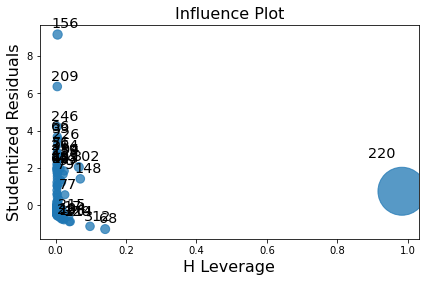

In [13]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

# Region 220 (Paris) completely distorts the regression
# dataset.loc[220]

In [23]:
results = smf.ols(
    'Généraliste ~ Densité + Classement',
    data = waiting[ waiting["Territoire"] != "Paris" ]
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Généraliste   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.523
Date:                Fri, 31 Dec 2021   Prob (F-statistic):             0.0819
Time:                        11:43:32   Log-Likelihood:                -1557.1
No. Observations:                 312   AIC:                             3120.
Df Residuals:                     309   BIC:                             3131.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.7231      3.150      5.945      0.000      12.526      24.920
Densité       -0.0082      0.014     -0.603      0.547      -0.035       0.019
Classement     0.0024      0.001      2.013      0.045    5.39e-05       0.005
==============================================================================
Omnibus:                      279.888   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5525.633
Skew:                           3.753   Prob(JB):                         0.00
Kurtosis:                      22.202   Cond. No.                     3.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

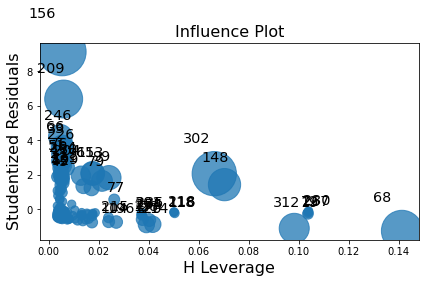

In [24]:
fig = sm.graphics.influence_plot(results, criterion="cooks")
fig.tight_layout(pad=1.0)

# Many regions are outside the Cook region and
# thus have a quite high leverage on the results...

### Régression linéaire généralisée

In [25]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

dataset = pd.read_csv("data/donnees concatenees.csv")

results = smf.glm(
    'Généraliste ~ Densité + Classement',
    data=waiting[ waiting["Territoire"] != "Paris" ],
    family=sm.families.Gamma()
).fit()

results.summary()

# pas d'amélioration avec un lien "exponentiel"

/root/venv/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:301: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Généraliste   No. Observations:                  312
Model:                            GLM   Df Residuals:                      309
Model Family:                   Gamma   Df Model:                            2
Link Function:          inverse_power   Scale:                          3.2968
Method:                          IRLS   Log-Likelihood:                -1320.4
Date:                Fri, 31 Dec 2021   Deviance:                       551.07
Time:                        11:44:40   Pearson chi2:                 1.02e+03
No. Iterations:                     9   Pseudo R-squ. (CS):           -0.05584
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0525      0.008      6.445      0.000       0.037       0.068
Densité     3.256e-05   4.66e-05      0.699      0.485   -5.88e-05       0.000
Classement -4.741e-06   8.66e-07     -5.473      0.000   -6.44e-06   -3.04e-06
==============================================================================
"""

### Récupération des résidus

In [ ]:
results.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f812232-8ed1-4e89-8f48-597e10058637' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>